In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import os 
import re 
import sys
import csv
import math
from distutils.dir_util import copy_tree
from pathlib import Path

import subprocess
import json

import subprocess
import time

# rootDir = os.getcwd()
rootDir = r'C:\Users\Laxman\Desktop\autoWoodSDA\Auto-WoodSDA'
# rootDir = r'/Users/laxmandahal/Desktop/UCLA/Phd/Research/woodSDA/autoWoodSDA_public'


# pd.set_option('display.max_colwidth', 100)
%load_ext autoreload
%autoreload 2

Importing source code from the design module

In [2]:
sys.path.append(os.path.join(rootDir, *['Codes','designModule']))

from FinalShearWallDesign_allFloors import FinalShearWallDesign
from StiffnessBasedDesign import RDADesignIterationClass

## setting up directories and folders for I/O purposes
# Utility function directory 
UtilDirectory = os.path.join(rootDir, *['Codes','modelingModule'])
# Base directory is the main directory that models, model inputs and utility directory stores
# BaseDirectory = rootDir
# Model directory is where you want to store your model
ModelDirectory = os.path.join(rootDir, 'BuildingModels')
# If there is no model directory, create one
Path(ModelDirectory).mkdir(parents=True, exist_ok=True)

# DB directory is where you store Database.csv (for steel section)
DBDirecctory = UtilDirectory

resultDirectory = os.path.join(rootDir, 'Results')
# create one if it already doesnot exist
Path(resultDirectory).mkdir(parents=True, exist_ok=True)

### Step 1:Design Module:
The design module designs the building per input specifications and outputs design summary with shear wall schedule for each story.

In [3]:
start = time.time()
caseID = 'MFD6B'
# caseID = BuildingList[0]
basedirectory = os.path.join(rootDir, *['BuildingInfo', caseID])
numFloors = 4
 
direction = ['X', 'X', 'X', 
             'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y']
wall_line_name = ['gridA', 'gridB', 'gridC',
                  'grid1', 'grid2','grid3','grid4','grid5','grid6', 'grid7']
numWallsPerLine = [4, 4, 4,
                  2, 2, 4, 2, 4, 2, 2]
counter = 0

rda = RDADesignIterationClass(caseID, basedirectory, direction,numWallsPerLine, counter, wall_line_name,
                              designScheme='ASD',
                              weight_factor=1, seismic_design_level='Extreme', mat_ext_int='Stucco_GWB')

# rda.maindf
# rda.maindf.to_csv(os.path.join(resultDirectory, "FinalDesignOutput.csv"))
stop = time.time()
print( stop - start, 'seconds')

17.805569887161255 seconds


In [4]:
rda.maindf

ASD(klf)  D/C Ratio  Drift(in)  Ga(k/in)  \
swDesign_gridA_wall1 0     0.100   0.906329   0.928119       5.2   
                     1     0.340   0.799702   0.639139      19.0   
                     2     0.585   0.929568   0.558756      42.0   
                     3     0.870   0.887032   0.775445      48.0   
swDesign_gridA_wall2 0     0.100   0.906492   0.918493       5.2   
                     1     0.340   0.799846   0.630159      19.0   
                     2     0.585   0.929735   0.548572      42.0   
                     3     0.870   0.887192   0.750430      48.0   
swDesign_gridA_wall3 0     0.100   0.906492   0.918493       5.2   
                     1     0.340   0.799846   0.630159      19.0   
                     2     0.585   0.929735   0.548572      42.0   
                     3     0.870   0.887192   0.750430      48.0   
swDesign_gridA_wall4 0     0.100   0.906329   0.928119       5.2   
                     1     0.340   0.799702   0.639139      19.0   
                     2     0.585   0.929568   0.558756      42.0   
                     3     0.870   0.887032   0.775445      48.0   
swDesign_gridB_wall1 0     0.100   0.941271   0.811513       5.2   
                     1     0.340   0.830533   0.504974      19.0   
                     2     0.585   0.965406   0.498604      42.0   
                     3     0.870   0.921230   0.560188      48.0   
swDesign_gridB_wall2 0     0.100   0.941290   0.811837       5.2   
                     1     0.340   0.830550   0.479411      19.0   
                     2     0.585   0.965426   0.497089      42.0   
                     3     0.870   0.921249   0.525428      48.0   
swDesign_gridB_wall3 0     0.100   0.941271   0.811513       5.2   
                     1     0.340   0.830533   0.504974      19.0   
                     2     0.585   0.965406   0.498604      42.0   
                     3     0.870   0.921230   0.560188      48.0   
swDesign_gridB_wall4 0     0.100   0.941290   0.811837       5.2   
                     1     0.340   0.830550   0.479411      19.0   
...                          ...        ...        ...       ...   
swDesign_grid5_wall1 2     0.585   0.915135   0.476307      42.0   
                     3     0.770   0.986670   0.618034      52.0   
swDesign_grid5_wall2 0     0.100   0.892256   0.766665       5.2   
                     1     0.340   0.787285   0.522457      19.0   
                     2     0.585   0.915135   0.476307      42.0   
                     3     0.770   0.986670   0.618034      52.0   
swDesign_grid5_wall3 0     0.100   0.892256   0.766665       5.2   
                     1     0.340   0.787285   0.522457      19.0   
                     2     0.585   0.915135   0.476307      42.0   
                     3     0.770   0.986670   0.618034      52.0   
swDesign_grid5_wall4 0     0.100   0.892256   0.766665       5.2   
                     1     0.340   0.787285   0.522457      19.0   
                     2     0.585   0.915135   0.476307      42.0   
                     3     0.770   0.986670   0.618034      52.0   
swDesign_grid6_wall1 0     0.100   0.815777   0.853857       5.2   
                     1     0.340   0.719803   0.848915      19.0   
                     2     0.510   0.959738   0.877979      32.0   
                     3     0.770   0.902098   0.887104      52.0   
swDesign_grid6_wall2 0     0.100   0.815777   0.853857       5.2   
                     1     0.340   0.719803   0.848915      19.0   
                     2     0.510   0.959738   0.877979      32.0   
                     3     0.770   0.902098   0.887104      52.0   
swDesign_grid7_wall1 0     0.100   0.815777   0.853857       5.2   
                     1     0.340   0.719803   0.848915      19.0   
                     2     0.510   0.959738   0.877979      32.0   
                     3     0.770   0.902098   0.887104      52.0   
swDesign_grid7_wall2 0     0.100   0.815777   0.853857       5.2   
            

In [5]:
# import psutil;
# print(psutil.Process(os.getpid()).memory_info().rss / 1024 ** 2, 'MB memory required')


### Step 2: Modeling Module
Implement the modeling module to genere a suite of OpenSees models. Three individual models are created for Modal, Pushover, and Dyanmic analysis. The flag ___RunPushoverSwitch___ automatically runs the pushover analysis after creating the required tcl files.

In [6]:
sys.path.append(os.path.join(rootDir, *['Codes','modelingModule']))
from BuildingModelClass import BuildingModel
from utils import *

In [7]:
start = time.time()

# Generate eigen analysis, pushover analysis and dynamic analysis models
design_level = 'Extreme'

InfoDirectory = os.path.join(rootDir, *['BuildingInfo', caseID])
ModelClass = BuildingModel(caseID, InfoDirectory, seismic_design_level = design_level)

# alternatively, one can choose to read inputs from json 
ModelClass.read_in_txt_inputs(caseID, InfoDirectory)

# if os.path.isdir(ModelDirectory+'/%s'%BuildingList[i]) != True:
#     os.chdir(ModelDirectory)
#     os.mkdir('%s'%BuildingList[i])

os.chdir(ModelDirectory+'/%s'%caseID)
period = generateModalAnalysisModel(ModelClass.ID, ModelClass, rootDir, DBDirecctory)
# Turn off RunPushoverSwitch to speed up the model creation 
generatePushoverAnalysisModel(ModelClass.ID, ModelClass, rootDir, DBDirecctory,
                           GenerateModelSwitch = True, RunPushoverSwitch = True)
generateDynamicAnalysisModel(ModelClass.ID, ModelClass, rootDir, DBDirecctory, period,
                           GenerateModelSwitch = True)
print(period)

finish = time.time()
print((finish - start)/60, 'Minutes')

[0.47873545671261836, 0.44088576850062644, 0.40483258086087187, 0.17383062505885144]
13.003056426843008 Minutes


In [8]:
BuildingList = [caseID]

In [9]:
sys.path.append(os.path.join(rootDir, *['Codes', 'PostProcessing']))

import ExtractMaxEDP as extractedps
import ExtractPushoverData as epd

## Eigen Analysis summary

In [10]:
eigenDirectory = os.path.join(rootDir, *['BuildingModels',BuildingList[0],'EigenValueAnalysis','Analysis_Results'])
periods = extractedps.ExtractPeriod(eigenDirectory)
periods

,0,1,2
0,0.478735,0.440886,0.404833


## Nonlinear static pushover curve

In [11]:
wt = np.loadtxt(os.path.join(rootDir, *['BuildingInfo',BuildingList[0],'Loads','floorWeights.txt']))
SeismicWeight = np.sum(wt)

BaseDirectory = os.path.join(rootDir, *['BuildingModels',BuildingList[0]])

PushoverX_rigid = epd.pushoverdata(BaseDirectory+ '\PushoverAnalysis\\', 'X', 'roof', SeismicWeight, numFloors)
PushoverResultsX_rigid = epd.extractpushoverpoints(PushoverX_rigid)

PushoverY_rigid = epd.pushoverdata(BaseDirectory+ '\PushoverAnalysis\\', 'Z', 'roof', SeismicWeight, numFloors)
PushoverResultsY_rigid = epd.extractpushoverpoints(PushoverY_rigid)

In [12]:
PushoverX = epd.pushoverdata(BaseDirectory+ '\PushoverAnalysis\\', 'X', 'roof', SeismicWeight, numFloors)
PushoverResultsX = epd.extractpushoverpoints(PushoverX)

PushoverResultsX = np.append(np.array(PushoverResultsX), PushoverX[1][-1])

PushoverY = epd.pushoverdata(BaseDirectory+ '\PushoverAnalysis\\', 'Z', 'roof', SeismicWeight, numFloors)
PushoverResultsY = epd.extractpushoverpoints(PushoverY)

PushoverResultsY = np.append(np.array(PushoverResultsY), PushoverY[1][-1])

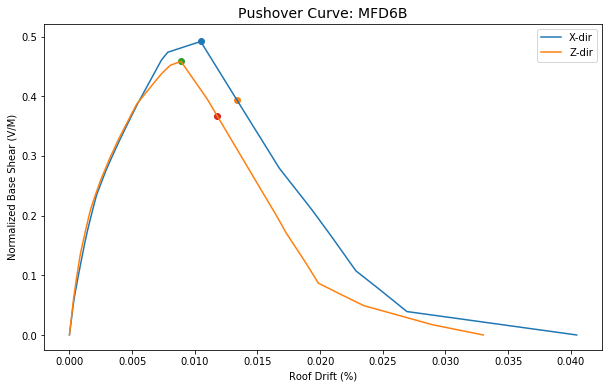

In [13]:
plt.figure(figsize = (10,6))
plt.plot(PushoverX[1],PushoverX[0],label = 'X-dir')
plt.plot(PushoverY[1],PushoverY[0],label = 'Z-dir')

plt.scatter(PushoverResultsX[1],PushoverResultsX[0])
plt.scatter(PushoverResultsX[2], 0.8*PushoverResultsX[0])

plt.scatter(PushoverResultsY[1],PushoverResultsY[0])
plt.scatter(PushoverResultsY[2], 0.8*PushoverResultsY[0])

plt.xlabel('Roof Drift (%)')
plt.ylabel('Normalized Base Shear (V/M)')
plt.title(f'Pushover Curve: {caseID}', fontsize = 14)
plt.legend()
plt.show()


In [14]:
df = pd.DataFrame([PushoverResultsX, PushoverResultsY], 
                  columns = ['Peak Strength', 'Drift at Peak', 'Drift at 80%Peak', 'Max Drift'],
                  index = ['X', 'Y'])
df.head()

,Peak Strength,Drift at Peak,Drift at 80%Peak,Max Drift
X,0.491818,0.010469,0.013371,0.040471
Y,0.458348,0.008894,0.011802,0.033019


### Run dynamic analysis 

Files required to run dynamic analysis has been created in the previous step, the following code iteratively runs the dynamic analysis upto the specified number of Ground motions.


In [15]:
### MSA using selected GM records for 5 hazard levels. Location: Boelter Hall
Scale_Sa_GM = '0.403 0.975 1.307 1.676 2.237'
GM_Num = '50 47 47 48 47'

# GM_ID = 1 # GM pair
GM_folder = r'GM_sets/BoelterHall'

Model_Name = BuildingList[0]


# start_ID is tarting index which starts from 1 instead of 0
# finish_ID is the total number of GMs in multiple stripe or incremental dynamic analysis
# for eg: if you have 10 hazard levels with 22 GM pairs, finish_id should be 10*22 + 1
start_ID, finish_ID = 1, 3 # for demonstration I'm running dynamic analysis for 2 ground motion pairs
acc_time = 0
start_time = time.time()


## following chucks of codes run dynamic analysis for each ground motion pair iteratively
# Pairing ID == 1 i.e. apply H1 motion in X and H2 motion in Z
for GM_ID in range(start_ID, finish_ID):
    s = time.time()
    SetupDyamaicAnalysis(ModelDirectory, Scale_Sa_GM, GM_Num, GM_ID, GM_folder, Model_Name, 1)
    os.chdir(ModelDirectory)
    r = os.system('OpenSees RunDynamic_Single.tcl')
    f = time.time()
    if not r: 
        print('Hazard Level %i GM Pair %s with Pairing ID %i has finished successfully in %.3fs!'%(int(GM_ID/50)+1, str(GM_ID-int(GM_ID/50)), 1, f-s))
        os.remove('RunDynamic_Single.tcl')
        acc_time += (f-s)
        #print('Estimate remaining time %.3fs!'%(acc_time/(GM_ID - start_ID)*(finish_ID - GM_ID)))
    else: 
        print('GM Pair %s has failed'%str(GM_ID))
        break

# Pairing ID == 2 i.e. apply H2 motion in X and H1 motion in Z
for GM_ID in range(start_ID, finish_ID):
    s = time.time()
    SetupDyamaicAnalysis(ModelDirectory, Scale_Sa_GM, GM_Num, GM_ID, GM_folder, Model_Name, 2)
    os.chdir(ModelDirectory)
    r = os.system('OpenSees RunDynamic_Single.tcl')
    f = time.time()
    if not r: 
#         print('Hazard Level %i GM Pair %s with Pairing ID %i has finished successfully in %.3fs!'%(int(GM_ID/22)+1, str(GM_ID-int(GM_ID/22)), 2, f-s))
        os.remove('RunDynamic_Single.tcl')
        acc_time += (f-s)
        #print('Estimate remaining time %.3fs!'%(acc_time/(GM_ID - start_ID)*(finish_ID - GM_ID)))
    else: 
        print('GM Pair %s has failed'%str(GM_ID))
        break

finish_time = time.time()
print('The total runtime is %.3f minutes' %(int(finish_time-start_time)/60))

Hazard Level 1 GM Pair 1 with Pairing ID 1 has finished successfully in 25.873s!
Hazard Level 1 GM Pair 2 with Pairing ID 1 has finished successfully in 64.328s!
The total runtime is 2.500 minutes


## Post-processing Dyanmic Analysis results

Execute the following lines of only after all the dynamic analyses have been completed for all the hazard levels

In [16]:
# NumGM = np.array([50, 47, 47, 48, 47])

# CollapseCriteria = 0.1
# DemolitionCriteria = 0.01

# HazardLevel = np.array([0.403, 0.975, 1.307, 1.676, 2.237])

# dynamicDirectory = os.path.join(cwd, *['BuildingModels',BuildingList[0],'DynamicAnalysis'])

# sdr = extractedps.ExtractSDR(dynamicDirectory, HazardLevel, NumGM, numFloors)
# rdr = extractedps.ExtractRDR(dynamicDirectory, HazardLevel, NumGM, NumStory)
# gmDirectory = r'C:\Users\Laxman\Desktop\Python Tool\BuildingModels\GM_sets\BoelterHall'
# PGA = extractedps.ExtractPGA(gmDirectory, HazardLevel, NumGM)
# pfa = extractedps.ExtractPFA(dynamicDirectory, HazardLevel, NumGM, NumStory, PGA, g = 386.4)


In [17]:
## for now I'm importing an example EDP data from another example for demonstration purposes
pfa = pd.read_csv(os.path.join(resultDirectory, 'PFA.csv'), header=None)
sdr = pd.read_csv(os.path.join(resultDirectory,'SDR.csv'), header=None)
rdr = pd.read_csv(os.path.join(resultDirectory,'RDR.csv'), header=None)

### preprocess input data for pelicun

In [18]:
index_name = []
median = []
log_std = []
#1-PFA-0-1
for stripe in pfa[0].unique():
    churn_df = pfa[pfa[0]==stripe]
    story_name = 0 
    for story in churn_df.columns:
        for uniq_dir in pfa[1].unique():
            if story >=3:
                story_name = story - 3
                index_name.append('%s-PFA-%s-%s'%(stripe, story_name, uniq_dir))
                median.append(pfa[(pfa[0]==stripe) & (pfa[1]==uniq_dir)][story].median())
                log_std.append(pfa[(pfa[0]==stripe) & (pfa[1]==uniq_dir)][story].std())
d = {
    'idx': index_name, 
    'median': median, 
    'log_std': log_std
}
df_pfa = pd.DataFrame(d)
df_pfa = df_pfa.set_index('idx')

## PID
index_name = []
median = []
log_std = []
#1-PID-0-1
for stripe in sdr[0].unique():
    churn_df = sdr[sdr[0]==stripe]
    story_name = 0 
    for story in churn_df.columns:
        for uniq_dir in sdr[1].unique():
            if story >=3:
                story_name = story - 2
                index_name.append('%s-PID-%s-%s'%(stripe, story_name, uniq_dir))
                median.append(sdr[(sdr[0]==stripe) & (sdr[1]==uniq_dir)][story].median())
                log_std.append(sdr[(sdr[0]==stripe) & (sdr[1]==uniq_dir)][story].std())
d = {
    'idx': index_name, 
    'median': median, 
    'log_std': log_std
}
df_sdr = pd.DataFrame(d)
df_sdr = df_sdr.set_index('idx')

## combine two dfs 
df_comb = pd.concat([df_pfa, df_sdr])
df_comb.head()

,log_std,median
idx,,
1-PFA-0-1,0.095756,0.148458
1-PFA-0-2,0.083856,0.146941
1-PFA-1-1,0.125878,0.227519
1-PFA-1-2,0.113289,0.210666
1-PFA-2-1,0.126647,0.231842


In [19]:
#parameters
sample_size = 10000
delta_y = 0.0075
stripe = '3' # this is the hazard level

In [20]:
# from pelicun.base import set_options, convert_to_MultiIndex
# from pelicun.assessment import Assessment

In [21]:
# prepare demand input
raw_demands = convert_to_MultiIndex(df_comb, axis=0)
raw_demands.index.names = ['stripe','type','loc','dir']

# prepare the demand input for pelicun
stripe_demands = raw_demands.loc[stripe,:]

# units - - - - - - - - - - - - - - - - - - - - - - - -  
stripe_demands.insert(0, 'Units',"")
stripe_demands.loc['PFA','Units'] = 'g'
stripe_demands.loc['PID','Units'] = 'rad'

# distribution family  - - - - - - - - - - - - - - - - -  
stripe_demands.insert(1, 'Family',"")
stripe_demands['Family'] = 'lognormal'

# distribution parameters  - - - - - - - - - - - - - - -
stripe_demands.rename(columns = {'median': 'Theta_0'}, inplace=True)
stripe_demands.rename(columns = {'log_std': 'Theta_1'}, inplace=True)

# prepare a correlation matrix that represents perfect correlation
ndims = stripe_demands.shape[0]
demand_types = stripe_demands.index 

perfect_CORR = pd.DataFrame(
    np.ones((ndims, ndims)),
    columns = demand_types,
    index = demand_types)

# prepare additional fragility and consequence data ahead of time
cmp_marginals = pd.read_csv('CMP_marginals.csv', index_col=0)

# add missing data to P58 damage model
P58_data = PAL.get_default_data('fragility_DB_FEMA_P58_2nd')
cmp_list = cmp_marginals.index.unique().values[:-3]

# now take those components that are incomplete, and add the missing information
additional_fragility_db = P58_data.loc[cmp_list,:].loc[P58_data.loc[cmp_list,'Incomplete'] == 1].sort_index()

# D2022.013a, 023a, 023b - Heating, hot water piping and bracing
# dispersion values are missing, we use 0.5
additional_fragility_db.loc[['D.20.22.013a','D.20.22.023a','D.20.22.023b'],
                            [('LS1','Theta_1'),('LS2','Theta_1')]] = 0.5

# D2031.013b - Sanitary Waste piping
# dispersion values are missing, we use 0.5
additional_fragility_db.loc['D.20.31.013b',('LS1','Theta_1')] = 0.5

# D2061.013b - Steam piping
# dispersion values are missing, we use 0.5
additional_fragility_db.loc['D.20.61.013b',('LS1','Theta_1')] = 0.5

# D3031.013i - Chiller
# use a placeholder of 3.0|0.5
additional_fragility_db.loc['D.30.31.013i',('LS1','Theta_0')] = 3.0
additional_fragility_db.loc['D.30.31.013i',('LS1','Theta_1')] = 0.5

# D3031.023i - Cooling Tower
# use a placeholder of 3.0|0.5
additional_fragility_db.loc['D.30.31.023i',('LS1','Theta_0')] = 3.0
additional_fragility_db.loc['D.30.31.023i',('LS1','Theta_1')] = 0.5

# D3052.013i - Air Handling Unit
# use a placeholder of 3.0|0.5
additional_fragility_db.loc['D.30.52.013i',('LS1','Theta_0')] = 3.0
additional_fragility_db.loc['D.30.52.013i',('LS1','Theta_1')] = 0.5

# prepare the extra damage models for collapse and irreparable damage
additional_fragility_db.loc[
    'excessiveRID', [('Demand','Directional'),
                    ('Demand','Offset'),
                    ('Demand','Type'), 
                    ('Demand','Unit')]] = [1, 0, 'Residual Interstory Drift Ratio', 'rad']   

additional_fragility_db.loc[
    'excessiveRID', [('LS1','Family'),
                    ('LS1','Theta_0'),
                    ('LS1','Theta_1')]] = ['lognormal', 0.01, 0.3]   

additional_fragility_db.loc[
    'irreparable', [('Demand','Directional'),
                    ('Demand','Offset'),
                    ('Demand','Type'), 
                    ('Demand','Unit')]] = [1, 0, 'Peak Spectral Acceleration|1.13', 'g']   

additional_fragility_db.loc[
    'irreparable', ('LS1','Theta_0')] = 1e10

additional_fragility_db.loc[
    'collapse', [('Demand','Directional'),
                 ('Demand','Offset'),
                 ('Demand','Type'), 
                 ('Demand','Unit')]] = [1, 0, 'Peak Spectral Acceleration|1.13', 'g']   

additional_fragility_db.loc[
    'collapse', [('LS1','Family'),
                 ('LS1','Theta_0'),
                 ('LS1','Theta_1')]] = ['lognormal', 1.35, 0.5]  

# Now we can set the incomplete flag to 0 for these components
additional_fragility_db['Incomplete'] = 0

# create the additional consequence models
additional_consequences = pd.DataFrame(
    columns = pd.MultiIndex.from_tuples([
        ('Incomplete',''), ('Quantity','Unit'), ('DV', 'Unit'), ('DS1', 'Theta_0')]),
    index=pd.MultiIndex.from_tuples([
        ('replacement','Cost'), ('replacement','Time')])
)

additional_consequences.loc[('replacement', 'Cost')] = [0, '1 EA', 'USD_2011', 21600000]
additional_consequences.loc[('replacement', 'Time')] = [0, '1 EA', 'worker_day', 12500]

NameError: name 'convert_to_MultiIndex' is not defined

### Generate demand samples

In [ ]:
# initialize a pelicun Assessment
PAL = Assessment({"PrintLog": True, "Seed": 415,})

# load the demand model
PAL.demand.load_model({'marginals': stripe_demands,
                       'correlation': perfect_CORR})

# generate samples
PAL.demand.generate_sample({"SampleSize": sample_size})

# add residual drift and Sa
demand_sample = PAL.demand.save_sample()

RID = PAL.demand.estimate_RID(demand_sample['PID'], {'yield_drift': delta_y})
demand_sample_ext = pd.concat([demand_sample, RID], axis=1)

Sa_vals = [0.158, 0.387, 0.615, 0.843, 1.071, 1.299, 1.528, 1.756]
demand_sample_ext[('SA_1.13',0,1)] = Sa_vals[int(stripe)-1]

# add units to the data 
demand_sample_ext.T.insert(0, 'Units',"")

# PFA and SA are in "g" in this example, while PID and RID are "rad"
demand_sample_ext.loc['Units', ['PFA', 'SA_1.13']] = 'g'
demand_sample_ext.loc['Units',['PID', 'RID']] = 'rad'

PAL.demand.load_sample(demand_sample_ext)

### assess damages

In [ ]:
# specify number of stories
PAL.stories = 4

# load component definitions
cmp_marginals = pd.read_csv('CMP_marginals.csv', index_col=0)
PAL.asset.load_cmp_model({'marginals': cmp_marginals})

# generate sample
PAL.asset.generate_cmp_sample(sample_size)

# load the models into pelicun
PAL.damage.load_damage_model([
    additional_fragility_db,  # This is the extra fragility data we've just created
    'PelicunDefault/fragility_DB_FEMA_P58_2nd.csv' # and this is a table with the default P58 data    
])

# prescribe the damage process
dmg_process = {
    "1_collapse": {
        "DS1": "ALL_NA"
    },
    "2_excessiveRID": {
        "DS1": "irreparable_DS1"
    }
}

# calculate damages
PAL.damage.calculate(dmg_process=dmg_process)

### Losses

In [ ]:
# create the loss map
drivers = [f'DMG-{cmp}' for cmp in cmp_marginals.index.unique()]
drivers = drivers[:-3]+drivers[-2:]

loss_models = cmp_marginals.index.unique().tolist()[:-3] +['replacement',]*2

loss_map = pd.DataFrame(loss_models, columns=['BldgRepair'], index=drivers)

# load the loss model
PAL.bldg_repair.load_model(
    [additional_consequences,
     "PelicunDefault/bldg_repair_DB_FEMA_P58_2nd.csv"], 
    loss_map)

# perform the calculation
PAL.bldg_repair.calculate()

# get the aggregate losses
agg_DF = PAL.bldg_repair.aggregate_losses()

agg_DF.describe([0.1, 0.5, 0.9])

### Alternatively,

In [ ]:
from lossModule.driverPelicun_E2E import main

In [ ]:
building_index = 0
main(building_index)

## ATC-138 Functional Recovery Methodology

In [ ]:
import matlab.engine
from lossModule.driverATC138_E2E import main_hazard_agnostic

In [ ]:
main_hazard_agnostic(building_index)